In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [7]:
df_raw = pd.read_csv('/home/jupyter-mouguntu/Train.csv', low_memory=False,parse_dates=["saledate"])

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [16]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [17]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Initial processing

In [10]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Low'

In [11]:
fld = df_raw.saledate

In [13]:
fld.dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
5         2008
6         2004
7         2005
8         2009
9         2007
10        2008
11        2006
12        2005
13        2006
14        2006
15        2006
16        2007
17        2010
18        2006
19        2005
20        2006
21        2006
22        2007
23        2006
24        2004
25        2006
26        2006
27        2007
28        2007
29        2006
          ... 
401095    2011
401096    2011
401097    2011
401098    2011
401099    2011
401100    2011
401101    2011
401102    2011
401103    2011
401104    2011
401105    2011
401106    2011
401107    2011
401108    2011
401109    2011
401110    2011
401111    2011
401112    2011
401113    2011
401114    2011
401115    2011
401116    2011
401117    2011
401118    2011
401119    2011
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [16]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [17]:
train_cats(df_raw)

In [18]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
5            Low
6           High
7           High
8            Low
9         Medium
10        Medium
11           Low
12           NaN
13        Medium
14           Low
15        Medium
16           Low
17           NaN
18           Low
19        Medium
20        Medium
21        Medium
22           Low
23          High
24        Medium
25        Medium
26           Low
27           NaN
28           Low
29        Medium
           ...  
401095       NaN
401096       NaN
401097       NaN
401098       NaN
401099       NaN
401100       NaN
401101       NaN
401102       NaN
401103       NaN
401104       NaN
401105       NaN
401106       NaN
401107       NaN
401108       NaN
401109       NaN
401110       NaN
401111       NaN
401112       NaN
401113       NaN
401114       NaN
401115       NaN
401116       NaN
401117       NaN
401118       NaN
401119       NaN
401120       NaN
401121       NaN
401122       N

In [19]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [20]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [21]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [22]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [23]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

### Pre-processing

In [5]:
#!{sys.executable} -m pip install --user pyarrow==0.10.0
!pip install --user six
import pandas as pd

In [6]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [7]:
#def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,preproc_fn=None, max_n_cat=None, subset=None, mapper=None)
df, y, nas = proc_df(df_raw, 'SalePrice')

We now have something we can pass to a random forest!

In [8]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9831005006654091

In [9]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

# Random Forests

## Base model

Let's try our model again, this time with separate training and validation sets.

In [10]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [11]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 9s, sys: 187 ms, total: 1min 9s
Wall time: 8.64 s
[0.09025773560067503, 0.24953670630263378, 0.9829743503065675, 0.8887969111051718]


## Speeding things up

In [12]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [13]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.5 s, sys: 65 µs, total: 2.5 s
Wall time: 356 ms
[0.11166553585299756, 0.36033206499165715, 0.9728129006470317, 0.7681250704051955]


## Single tree

In [14]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5200115764748594, 0.5831179826147025, 0.4104093473564089, 0.3927593402860722]


In [15]:
!{sys.executable} -m pip install --user graphviz

In [16]:
draw_tree(m.estimators_[0], df_trn, precision=3)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Let's see what happens if we create a bigger tree.

In [17]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3.076740298213702e-17, 0.44784371569644366, 1.0, 0.6418203210703831]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

## Bagging

### Intro to bagging

To learn about bagging in random forests, let's start with our basic model again.

In [18]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11243002055711761, 0.35034509330796426, 0.9724393696809629, 0.780800250818366]


We'll grab the predictions for each individual tree, and look at one example.

In [19]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([10.08581,  8.92266,  9.21034,  9.39266,  8.95545,  9.3501 ,  9.43348,  9.15905,  9.08251,  9.39266]),
 9.2984720076415,
 9.104979856318357)

In [20]:
preds.shape

(10, 12000)

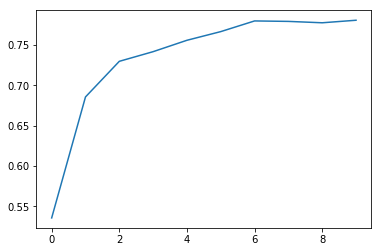

In [21]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [22]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10168737398922784, 0.34386474046878246, 0.9774545644453999, 0.7888343536864391]


In [23]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09635861898719361, 0.3431297370144505, 0.979755563174505, 0.7897361129243772]


In [24]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09367731892657509, 0.33809365302161154, 0.9808665418481135, 0.7958628675865704]


### Out-of-bag (OOB) score

In [25]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0967714033097208, 0.33742387774587135, 0.9795817440529433, 0.796670871957238, 0.8528874735071424]


## Reducing over-fitting

### Subsampling

In [26]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [27]:
set_rf_samples(20000)

In [28]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/home/jupyter-mouguntu/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 6.76 s, sys: 353 ms, total: 7.12 s
Wall time: 2.44 s
[0.24061245407621892, 0.27472644598136897, 0.87900399495763, 0.8652127198642683, 0.8664857377917876]


In [29]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22698085141746543, 0.26232764904776246, 0.892325399877974, 0.8771044639269746, 0.8807884922780738]


### Tree building parameters

In [30]:
reset_rf_samples()

In [31]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [32]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07837559593152851, 0.23735803883818973, 0.987162024630214, 0.8993865910312654, 0.9085868068131432]


In [33]:
t=m.estimators_[0].tree_

In [34]:
dectree_max_depth(t)

47

In [35]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14073300303233555, 0.23400686917267122, 0.9586070159613689, 0.9022075816205712, 0.9069759740091913]


In [36]:
t=m.estimators_[0].tree_

In [37]:
dectree_max_depth(t)

41

In [38]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11514954883753675, 0.23340353682032977, 0.9722885463818439, 0.9027112016161627, 0.9083707878499303]


In [39]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1192399847020663, 0.22777159912246012, 0.9702848005663383, 0.907349639021974, 0.91156116333196]
